In [ ]:
%matplotlib inline
style.use('dark_background')
import os
import logging
from scipy.interpolate import interp1d
root = logging.getLogger()
root.setLevel(logging.WARN)
import warnings
warnings.filterwarnings('ignore')

Constants:

In [ ]:
c = 299792458.0

Defining pulse parameters:

In [59]:
tspan = 2.0e-12
t_fwhm = 50e-15
tau = t_fwhm / sqrt(2*log(2))
# tau = 30e-15
l0 = 800e-9
w0 = 2*pi*c/l0
N = 8192
dt = tspan / N
t = np.linspace(-tspan/2, tspan/2, N)
w = fft.fftshift((2*pi*fft.fftfreq(N, d=dt)))

In [60]:
w0*1e-15

2.354564459136067

In [61]:
ph = 0.0
E_t = exp(-t**2/tau**2 + ph) * exp(1j*w0*t)

In [62]:
E_w = fft.fftshift(fft.fft(E_t))

The materials are defined as interpolators in a dictionary. Non-defined wavelengths give NaN for refractive index.

In [71]:
materials = {}
l_mat = linspace(200e-9, 2000e-9, 5000)
w_mat = 2*pi*c/l_mat
l2_mat = (l_mat*1e6)**2

n_bk7 = sqrt(1 + 1.03961212*l2_mat / (l2_mat-0.00600069867) + 
             0.231792344*l2_mat/(l2_mat-0.0200179144) + 
             1.01046945*l2_mat/(l2_mat-103.560653))

bk7_ip = interp1d(w_mat, n_bk7, bounds_error=False, fill_value=nan)
materials['bk7'] = bk7_ip

n_air = 1 + 0.05792105*l2_mat/(238.0185*l2_mat-1)+0.00167917*l2_mat/(57.362*l2_mat-1)
air_ip = interp1d(w_mat, n_air, bounds_error=False, fill_value=nan)
materials['air'] = air_ip

n_fs = sqrt(1 + 0.6961663*l2_mat / (l2_mat-0.0684043**2) + 
             0.4079426*l2_mat/(l2_mat-0.1162414**2) + 
             0.8974794*l2_mat/(l2_mat-9.896161**2))
fs_ip = interp1d(w_mat, n_fs, bounds_error=False, fill_value=nan)
materials['fs'] = fs_ip

n_mgf2 = sqrt(1 + 0.48755108*l2_mat / (l2_mat-0.04338408**2) + 
             0.39875031*l2_mat/(l2_mat-0.09461442**2) + 
             2.3120353*l2_mat/(l2_mat-23.793604**2))
mgf2_ip = interp1d(w_mat, n_mgf2, bounds_error=False, fill_value=nan)
materials['mgf2'] = mgf2_ip

n_sapphire_o = sqrt(1 + 1.4313493*l2_mat / (l2_mat-0.0726631**2) + 
             0.65054713*l2_mat/(l2_mat-0.1193242**2) + 
             5.3414021*l2_mat/(l2_mat-18.028251**2))
sapphire_o_ip = interp1d(w_mat, n_sapphire_o, bounds_error=False, fill_value=nan)
materials['sapphire_o'] = sapphire_o_ip

n_sapphire_e = sqrt(1 + 1.5039759*l2_mat / (l2_mat-0.0740288**2) + 
             0.55069141*l2_mat/(l2_mat-0.1216529**2) + 
             6.5927379*l2_mat/(l2_mat-20.072248**2))
sapphire_e_ip = interp1d(w_mat, n_sapphire_e, bounds_error=False, fill_value=nan)
materials['sapphire_e'] = sapphire_e_ip

n_bbo_o = sqrt(2.7405 + 0.0184 / (l2_mat-0.0179) - 0.0155*l2_mat)
bbo_o_ip = interp1d(w_mat, n_bbo_o, bounds_error=False, fill_value=nan)
materials['bbo_o'] = bbo_o_ip

n_bbo_e = sqrt(2.3730 + 0.0128 / (l2_mat-0.0156) - 0.0044*l2_mat)
bbo_e_ip = interp1d(w_mat, n_bbo_e, bounds_error=False, fill_value=nan)
materials['bbo_e'] = bbo_e_ip

z_bk7 = 50e-3
z_air = 0.0
z_mgf2 = 0e-3

In [72]:
k_w = w * materials['bk7'](w) / c
H_w = exp(-1j*k_w*z_bk7)
# k_w = w * materials['air'](w) / c
# H_w = H_w*exp(-1j*k_w*z_air)
# k_w = w * materials['mgf2'](w) / c
# H_w = H_w*exp(-1j*k_w*z_mgf2)
H_w[isnan(H_w)]=0

In [73]:
E_w_out = H_w*E_w
E_t_out = fft.ifft(fft.fftshift(E_w_out))

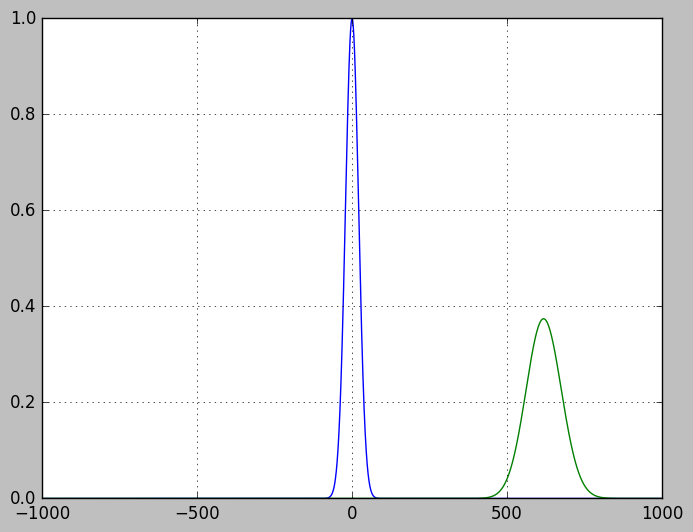

In [74]:
plot(t*1e15, abs(E_t)**2)
plot(t*1e15, abs(E_t_out)**2)
ax = gca()
#ax.set_xlim(-200, 200)
grid()

In [75]:
It = abs(E_t)**2
It /= It.max()
t_ind = np.where(np.diff(np.sign(It - 0.5)))[0]
if t_ind.shape[0] > 1:
    trace_fwhm = t[t_ind[-1]] - t[t_ind[0]]
trace_fwhm

4.9810767916005251e-14

In [76]:
It = abs(E_t_out)**2
It /= It.max()
t_ind = np.where(np.diff(np.sign(It - 0.5)))[0]
if t_ind.shape[0] > 1:
    trace_fwhm = t[t_ind[-1]] - t[t_ind[0]]
trace_fwhm

1.3356122573556348e-13

array([ -1.46383036e-07,  -1.46418783e-07,  -1.46454547e-07, ...,
         1.46490329e-07,   1.46454547e-07,   1.46418783e-07])

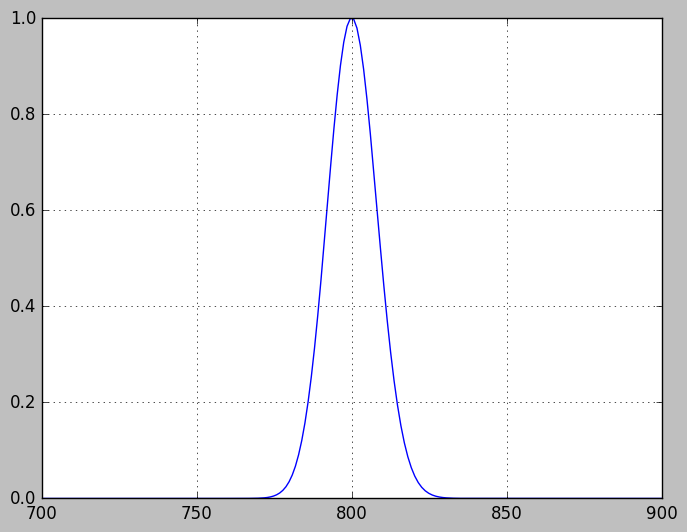

In [70]:
l = 2*pi*c/w
I_w = abs(E_w)**2
I_w /= I_w.max()
plot(l*1e9, I_w)
ax = gca()
ax.set_xlim(700, 900)
grid()
l